**Inclass: Unsupervised Learning**
- Durasi: 7 hours
- _Last Updated_: Desember 2023

___

- Disusun dan dikurasi oleh tim produk dan instruktur [Algoritma Data Science School](https://algorit.ma).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from pyod.models.lof import LOF

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from helper import *

# Introduction


Machine learning berfokus pada prediksi berdasarkan properti/fitur yang dipelajari dari data training. Beberapa tipe machine learning yaitu:


**Supervised Learning**: 

* memiliki target variable. 
* untuk pembuatan model prediksi $(y \sim x)$
* ada ground truth (label aktual) sehingga ada evaluasi model

**Unsupervised Learning**: 

* tidak memiliki target variable. 
* untuk mencari pola dalam data sehingga menghasilkan informasi yang berguna/dapat diolah lebih lanjut. umumnya dipakai untuk tahap explanatory data analysis (EDA)/data pre-processing.
* tidak ada ground truth sehingga sulit mengevaluasi model 

# Dimensionality Reduction

Tujuan dimensionality reduction adalah untuk **mereduksi banyaknya variabel (dimensi/fitur)** pada data dengan tetap **mempertahankan informasi sebanyak mungkin**. Dimensionality reduction dapat mengatasi masalah high-dimensional data. Kesulitan yang dihadapi pada high-dimensional data:

- Memerlukan waktu dan komputasi yang besar dalam melakukan pemodelan
- Melakukan visualisasi lebih dari tiga dimensi
- Menyulitkan pengolahan data (feature selection)

Note:

* **Dimensi**: kolom, semakin banyak kolom maka dimensi semakin tinggi.
* **Informasi**: [variance](#Glossary), semakin tinggi variance maka informasinya semakin banyak.

## Refresher on Variance

Berikut adalah data gaji perusahaan A dan B dalam **satuan juta rupiah**. 

Pertanyaan: Tanpa menghitung nilai [variance](#Glossary), perusahaan mana yang memiliki gaji lebih bervariasi?

In [2]:
# coba bandingkan variansi kedua data ini:
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
B = [4, 5, 5, 6, 6, 4, 6, 5, 4, 4]

print(np.var(A))
print(np.var(B))

8.25
0.6900000000000001


<div class="alert alert-block alert-warning">
<b>⚠️ Note:</b> variansi  bergantung pada skala variable 
</div>

Ada pula data gaji perusahaan C dalam **satuan dollar**. Untuk mempermudah, asumsi 1 dollar = 10000 rupiah

In [3]:
C = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
np.var(C)

82500.0

Apakah bisa dibilang gaji di perusahaan C lebih bervariasi daripada A?

> Ans:

## Motivation Example: Image Compression

Pada data gambar, setiap kotak pixel akan menjadi 1 kolom. Foto berukuran 40x40 pixel memiliki 1600 kolom (dimensi). Sekarang mari renungkan, berapa spesifikasi kamera handphone anda? Berapa besar dimensi data yang dihasilkan kamera Anda?

Image compression adalah salah satu contoh nyata dimensionality reduction menggunakan data gambar yang  dan tetap menghasilkan gambar yang serupa (informasi inti tidak hilang), sehingga data gambar lebih mudah diproses. Salah satu algoritma yang dapat digunakan untuk dimensionality reduction adalah **Principal Component Analysis (PCA)**.


<img src="assets/cat_pca.png" width="700">
    
<a href="https://www.tandfonline.com/doi/pdf/10.1080/09500340.2016.1270881" style="margin:auto; display:block;" class="button large hpbottom">alternatives on lenna image</a>

✅ **Knowledge Check:**

Dalam suatu gambar apa yang dimaksud dengan dimensi dan informasi?

- dimensi : panjang, lebar, layer
- informasi: warna/nilai pixel


Apakah nilai dari variansi dipengaruhi oleh skala dari nilai itu sendiri? jelaskan!

> Ans: iya.


## Principle Component Analysis

### Konsep

Ide dasar dari PCA adalah untuk membuat sumbu (axis) baru yang dapat menangkap informasi sebesar mungkin. Sumbu baru ini adalah yang dinamakan sebagai Principal Component (PC). Untuk melakukan dimensionality reduction, kita akan memilih beberapa PC untuk dapat merangkum informasi yang dibutuhkan

<img src="assets/ul10.JPG" width="700">

**Figure A (Sebelum PCA):**

- Sumbu/dimensi: X1 dan X2
- Variance data dijelaskan oleh X1 dan X2
- Dibuatlah sumbu baru untuk menangkap informasi X1 dan X2, yang dinamakan PC1 dan PC2

**Figure B (Setelah PCA):**

- Sumbu baru: PC1 dan PC2
- PC1 menangkap variance lebih banyak daripada PC2
- Misalkan PC1 menangkap 90% variance, dan sisanya ditangkap oleh PC2 yaitu 10%

💡 **Notes**:

- Membuat sumbu baru yang disebut dengan PC yang bertujuan untuk merangkum sebanyak mungkin informasi data
- Banyaknya jumlah PC sama dengan jumlah dimensi dari data
- PC1 pasti menangkap variance paling besar dibandingkan dengan PC 2, dan seterusnya
- Antara PC1 dan PC2 saling tegak lurus, artinya tidak saling berkorelasi
- Metode PCA akan cocok untuk data numerik yang saling berkorelasi

**✅ Knowledge Check:**

<img src="assets/knowledge check.png" width="500">

1.  Dari Gambar diatas mana data yang cocok dilakukan PCA?

-   [x] Sale Price of Vehicles
-   [ ] Blind Tasting
-   [x] Logistic Machinery

2.  Bila terdapat 3 PC, PC ke-berapa yang merangkum variansi (informasi) paling besar?

-   [x] PC1
-   [ ] PC2
-   [ ] PC3

3.  Dalam PCA jumlah PC yang dihasilkan sebanyak....

-   [x] Jumlah variabel yang digunakan
-   [ ] Setengah dari jumlah variabel yang digunakan
-   [ ] Ditentukan oleh user 

4.  PC1 dibentuk oleh variabel pertama dan PC4 dibentuk oleh variabel ke empat

-   [x] Salah
-   [ ] Benar

### Math Behind PCA [optional]

<div class="alert alert-block alert-success">
<b>&#128250; Rekomendasi Video:</b> <a href="https://www.youtube.com/watch?v=PFDu9oVAE-g" class="button large hpbottom">3Blue1Brown: Eigenvectors and eigenvalues</a>
</div>

Untuk membentuk PC dibutuhkan **eigen values** & **eigen vector**. Secara manual, eigen values dan eigen vector didapatkan dari operasi matrix.

Teori matrix:

* skalar: nilai yang memiliki magnitude/besaran
* vektor: nilai yang memiliki besaran dan arah (umum digambarkan dalam suatu koordinat)
* matrix: kumpulan nilai/bentukan data dalam baris dan kolom

**Eigen- dari suatu Matrix**

Untuk setiap matrix persegi $A$, terdapat **vektor spesial (eigen vector)** yang jika dikalikan dengan matrixnya, hasilnya akan sama dengan vektor tersebut dikalikan suatu **skalar (eigen value)**. Sehingga didapatkan rumus:

$$Ax = \lambda x$$

dengan $x$ adalah eigen vector dan $\lambda$ adalah eigen value dari matrix $A$.

Contoh:

Pada perhitungan matrix di bawah, salah satu eigen vector dari matrix 
$\begin{bmatrix}
2 & 3\\ 
2 & 1
\end{bmatrix}$
adalah 
$\begin{bmatrix}
3\\ 
2
\end{bmatrix}$
dengan eigen value sebesar 4.


$$
\left(\begin{array}{cc} 
2 & 3\\ 
2 & 1 
\end{array}\right)
\left(\begin{array}{cc} 
3\\ 
2
\end{array}\right)
=
\left(\begin{array}{cc} 
12\\ 
8
\end{array}\right)
=4
\left(\begin{array}{cc} 
3\\ 
2
\end{array}\right)
$$


Excel penjelasan math behind PCA yang lebih detail pada [spreadsheet ini](https://docs.google.com/spreadsheets/d/1u5tsmFSOrIcLlvwal5pylmNAcuVKq6Z0/edit?usp=sharing&ouid=110518730750176898509&rtpof=true&sd=true)

Teori eigen dipakai untuk menentukan PC dan nilai-nilai pada PC.

**Penerapan Eigen dalam PCA:**

**Matrix [covariance](#Glossary)** adalah matrix yang dapat merangkum informasi (variance) dari data. Kita menggunakan matrix covariance untuk mendapatkan eigen vector dan eigen value dari matrix tersebut, dengan:

* **eigen vector**: arah sumbu tiap PC, yang menjadi formula untuk mentransformasi data awal ke PC baru. 
* **eigen value**: variansi yang ditangkap oleh setiap PC.
* tiap PC memiliki 1 eigen value & 1 eigen vector.
* alur: matrix covariance $\rightarrow$ eigen value $\rightarrow$ eigen vector $\rightarrow$ nilai di tiap PC

Eigen vector akan menjadi formula untuk kalkulasi nilai di setiap PC. Contohnya, untuk data yang terdiri dari 2 variabel, bila diketahui eigen vector dari PC1 adalah:

$$x_{PC1}= \left[\begin{array}{cc}a_1\\a_2\end{array}\right]$$

Maka formula untuk menghitung nilai pada PC1 (untuk tiap barisnya) adalah:

$$PC1= a_1X_1 + a_2X_2$$

Keterangan:

* $x_{PC1}$ : eigen vector PC1 dari matrix covariance
* $a_1$, $a_2$ : konstanta dari eigen vector
* $PC1$ : nilai di PC1
* $X_1$, $X_2$ : nilai variabel X1 dan X2 di data awal

**Contoh menghitung eigen value dan eigen vector dari sebuah data**

In [4]:
# membuat data dummy
dummy = pd.DataFrame(np.random.rand(4, 2), #generate random value dengan 4 baris dan 2 kolom
                 columns=list('XY')) #nama tiap kolom
dummy

X         Y
0  0.270151  0.353341
1  0.431588  0.318417
2  0.463973  0.472383
3  0.441919  0.140279

Mencari nilai [covariance](#Glossary) pada dataframe dummy:

In [5]:
matrix_cov = dummy.cov()
matrix_cov

X         Y
X  0.007898 -0.000724
Y -0.000724  0.018877

Mencari nilai dan vector eigen dengan fungsi [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) dari library [numpy](https://numpy.org/doc/stable/index.html) 

In [6]:
eig_vals,eig_vecs = eig(matrix_cov.T) 
print('E-value: \n', eig_vals) #\n untuk newline (enter ke bawah)
print('E-vector: \n', eig_vecs)

E-value: 
 [0.00785033 0.01892412]
E-vector: 
 [[-0.99784899  0.06555444]
 [-0.06555444 -0.99784899]]


**Note**: hasil fungsi eig() tidak berurutan berdasarkan nilainya. Eigenvalues dari PC1 adalah nilai terbesar, dilanjutkan PC2 dengan nilai kedua terbesar dan seterusnya.    

* `E-value:`: Eigen value untuk tiap PC, besar variansi yang dapat ditangkap oleh tiap PC. Eigen value tertinggi adalah milik PC1, kedua tertinggi milik PC2, dan seterusnya. 

* `E-vector`: Eigen vector untuk tiap PC. Kolom `eig_vecs[:,i]` adalah vektor eigen yang sesuai dengan nilai eigen `eig_vals[i]`


### PCA Workflow

#### Business Question: Dimensionality Reduction for Fraud Bank Account dataset

Kita akan kembali menggunakan data `fraud_dataset.csv` yang sudah digunakan pada pembelajaran sebelumnya. Perbedaannya adalah kita akan menggunakan keseluruhan kolom pada data ini dan hanya akan membuang kolom yang kemaren kita jadikan sebagai target.

In [8]:
fraud = pd.read_csv('data_input/fraud_dataset.csv')
fraud.drop(columns=['fraud_bool'], inplace=True)
fraud.head()

income  name_email_similarity  current_address_months_count  customer_age  \
0     0.1               0.069598                          48.0            30   
1     0.9               0.891741                          61.0            20   
2     0.6               0.370933                          70.0            30   
3     0.9               0.401137                          64.0            30   
4     0.6               0.720006                          11.0            20   

   days_since_request  intended_balcon_amount payment_type  zip_count_4w  \
0            0.006760               -1.074674           AB          3483   
1            0.020642               -1.043444           AD          2849   
2            6.400793               48.520199           AA           406   
3            0.004651               -0.394588           AC           780   
4            0.032629               -0.487785           AC          4527   

   velocity_6h  velocity_24h  ...  phone_mobile_valid  has_other_cards  \
0  5316.092932   4527.956243  ...                   1                0   
1  8153.671429   7524.130278  ...                   1                1   
2  7648.434993   6366.061338  ...                   1                0   
3  6459.224179   3394.524379  ...                   1                0   
4  7852.258962   5177.826213  ...                   1                0   

   proposed_credit_limit foreign_request    source  session_length_in_minutes  \
0                  200.0               0  INTERNET                   5.191773   
1                  200.0               0  INTERNET                   3.901673   
2                  200.0               0  INTERNET                   3.777191   
3                  200.0               0  INTERNET                   3.176269   
4                  200.0               0  INTERNET                  14.626874   

  device_os  keep_alive_session  device_distinct_emails_8w  month  
0   windows                   1                        1.0      4  
1   windows                   0                        1.0      1  
2     linux                   0                        1.0      1  
3     linux                   1                        1.0      5  
4     linux                   0                        1.0      0  

[5 rows x 28 columns]

In [9]:
fraud.shape

(14905, 28)

**Penjelasan Dataset**

Berikut adalah penjelasan setiap kolom yang terdapat pada _dataset_:

- `income` (numeric): _Annual income of the applicant (in decile form). Ranges between [0.1, 0.9]._
- `name_email_similarity` (numeric): _Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1]._
- `current_address_months_count` (numeric): _Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value)._
- `customer_age` (numeric): _Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years._
- `days_since_request` (numeric): _Number of days passed since application was done. Ranges between [0, 79] days._
- `intended_balcon_amount` (numeric): _Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values)._
- `payment_type` (categorical): _Credit payment plan type. 5 possible (annonymized) values._
- `zip_count_4w` (numeric): _Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830]._
- `velocity_6h` (numeric): _Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818]._
- `velocity_24h` (numeric): _Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586]_
- `velocity_4w` (numeric): _Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020]._
- `bank_branch_count_8w` (numeric): _Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404]._
- `date_of_birth_distinct_emails_4w` (numeric): _Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39]._
- `employment_status` (categorical): _Employment status of the applicant. 7 possible (annonymized) values._
- `credit_risk_score` (numeric): _Internal score of application risk. Ranges between [−191, 389]._
- `email_is_free` (binary): _Domain of application email (either free or paid)._
- `housing_status` (categorical): _Current residential status for applicant. 7 possible (annonymized) values._
- `phone_home_valid` (binary): _Validity of provided home phone._
- `phone_mobile_valid` (binary): _Validity of provided mobile phone._
- `has_other_cards` (binary): _If applicant has other cards from the same banking company._
- `proposed_credit_limit` (numeric): _Applicant’s proposed credit limit. Ranges between [200, 2000]._
- `foreign_request` (binary): _If origin country of request is different from bank’s country._
- `source` (categorical): _Online source of application. Either browser (INTERNET) or app (TELEAPP)._
- `session_length_in_minutes` (numeric): _Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value)._
- `device_os` (categorical): _Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other._
- `keep_alive_session` (binary): _User option on session logout._
- `device_distinct_emails` (numeric): _Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value)._
- `month` (numeric): _Month where the application was made. Ranges between [0, 7]._
- `fraud_bool` (binary): _If the application is fraudulent or not._

In [11]:
fraud.describe().T

count         mean          std  \
income                            14905.0     0.571110     0.291264   
name_email_similarity             14905.0     0.481305     0.292755   
current_address_months_count      14905.0    88.974975    88.451892   
customer_age                      14905.0    34.377055    12.375090   
days_since_request                14905.0     1.044408     5.654084   
intended_balcon_amount            14905.0     7.986892    19.702913   
zip_count_4w                      14905.0  1571.105736   998.577819   
velocity_6h                       14905.0  5644.961419  3015.663715   
velocity_24h                      14905.0  4764.243186  1486.594023   
velocity_4w                       14905.0  4851.361779   923.966514   
bank_branch_count_8w              14905.0   184.168266   465.492287   
date_of_birth_distinct_emails_4w  14905.0     9.270446     5.037186   
credit_risk_score                 14905.0   136.478363    73.059616   
email_is_free                     14905.0     0.541899     0.498258   
phone_home_valid                  14905.0     0.400671     0.490051   
phone_mobile_valid                14905.0     0.883126     0.321280   
has_other_cards                   14905.0     0.213485     0.409781   
proposed_credit_limit             14905.0   551.910768   516.560244   
foreign_request                   14905.0     0.028782     0.167200   
session_length_in_minutes         14905.0     7.701999     8.329340   
keep_alive_session                14905.0     0.559074     0.496515   
device_distinct_emails_8w         14905.0     1.029520     0.197443   
month                             14905.0     3.293660     2.213049   

                                           min          25%          50%  \
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             9.299536e-05     0.206239     0.472416   
current_address_months_count      0.000000e+00    23.000000    55.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                9.352969e-07     0.007180     0.014989   
intended_balcon_amount           -1.253709e+01    -1.173150    -0.834826   
zip_count_4w                      3.600000e+01   893.000000  1267.000000   
velocity_6h                       4.510614e+01  3402.021768  5329.868693   
velocity_24h                      1.328410e+03  3574.620499  4743.172402   
velocity_4w                       2.995300e+03  4261.751108  4908.851274   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     5.000000     8.000000   
credit_risk_score                -1.540000e+02    85.000000   127.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes         3.941428e-02     3.164021     5.144863   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w         0.000000e+00     1.000000     1.000000   
month                             0.000000e+00     1.000000     3.000000   

                                          75%           max  
income                               0.800000      0.900000  
name_email_similarity                0.748003      0.999997  
current_address_months_count       132.000000    406.000000  
customer_age                        40.000000     90.000000  
days_since_request                   0.026107     75.820808  
intended_balcon_amount              -0.204896    111.697355  
zip_count_4w                      1941.000000   6349.000000  
velocity_6

In [13]:
fraud[(fraud["proposed_credit_limit"] < 200) | 
      (fraud["proposed_credit_limit"] > 2000)]

income  name_email_similarity  current_address_months_count  \
3452      0.9               0.217841                         151.0   
4132      0.8               0.217669                         145.0   
6750      0.1               0.455694                           1.0   
7963      0.9               0.120395                         106.0   
11876     0.6               0.881736                         191.0   

       customer_age  days_since_request  intended_balcon_amount payment_type  \
3452             50            0.028730               -1.341128           AB   
4132             40            0.027672               -0.440791           AC   
6750             20           14.514099               20.775652           AA   
7963             40            0.012002               -0.656258           AB   
11876            20            0.008135               -0.444774           AD   

       zip_count_4w  velocity_6h  velocity_24h  ...  phone_mobile_valid  \
3452           1079  6282.013124   4541.706722  ...                   1   
4132           2315  8315.118213   5571.455068  ...                   1   
6750            427  4947.668897   2017.106502  ...                   1   
7963             57  3933.426249   1529.275381  ...                   1   
11876          3065  6020.306561   4753.551112  ...                   1   

       has_other_cards  proposed_credit_limit foreign_request    source  \
3452                 0                 2100.0               0  INTERNET   
4132                 0                 2100.0               0  INTERNET   
6750                 0                  190.0               0  INTERNET   
7963                 0                  190.0               0  INTERNET   
11876                1                  190.0               0  INTERNET   

       session_length_in_minutes device_os  keep_alive_session  \
3452                    3.627373     linux                   0   
4132                    3.352775     linux                   0   
6750                   24.020736     other                   1   
7963                    0.759265   windows                   1   
11876                   3.089344     linux                   0   

       device_distinct_emails_8w  month  
3452                         1.0      4  
4132                         1.0      3  
6750                         1.0      7  
7963                         1.0      7  
11876                        1.0      0  

[5 rows x 28 columns]

In [15]:
fraud_clean = fraud.drop(columns=["intended_balcon_amount"])
fraud_clean = fraud_clean.drop(
    fraud_clean[(fraud_clean["proposed_credit_limit"] < 200) | 
                (fraud_clean["proposed_credit_limit"] > 2000)].index)

fraud_clean.shape

(14900, 27)

Pilih data yang hanya bertipe numeric :

In [17]:
cols = fraud_clean.select_dtypes("number").columns
fraud_num = fraud_clean[cols]
fraud_num.head(3)

income  name_email_similarity  current_address_months_count  customer_age  \
0     0.1               0.069598                          48.0            30   
1     0.9               0.891741                          61.0            20   
2     0.6               0.370933                          70.0            30   

   days_since_request  zip_count_4w  velocity_6h  velocity_24h  velocity_4w  \
0            0.006760          3483  5316.092932   4527.956243  4730.638776   
1            0.020642          2849  8153.671429   7524.130278  5341.758190   
2            6.400793           406  7648.434993   6366.061338  5431.786246   

   bank_branch_count_8w  ...  email_is_free  phone_home_valid  \
0                   680  ...              0                 0   
1                    13  ...              1                 0   
2                     2  ...              1                 0   

   phone_mobile_valid  has_other_cards  proposed_credit_limit  \
0                   1                0                  200.0   
1                   1                1                  200.0   
2                   1                0                  200.0   

   foreign_request  session_length_in_minutes  keep_alive_session  \
0                0                   5.191773                   1   
1                0                   3.901673                   0   
2                0                   3.777191                   0   

   device_distinct_emails_8w  month  
0                        1.0      4  
1                        1.0      1  
2                        1.0      1  

[3 rows x 22 columns]

Melihat nilai covariance pada dataframe `fraud_num` :

In [18]:
# covariance
fraud_num.cov()

income  name_email_similarity  \
income                             0.084830              -0.004591   
name_email_similarity             -0.004591               0.085705   
current_address_months_count      -0.612779               0.593454   
customer_age                       0.510647              -0.276976   
days_since_request                -0.003152              -0.008924   
zip_count_4w                     -22.873746               5.845287   
velocity_6h                      -90.073551              31.982689   
velocity_24h                     -50.620879              18.788020   
velocity_4w                      -31.058864              10.150233   
bank_branch_count_8w               1.463368               0.444386   
date_of_birth_distinct_emails_4w  -0.117235               0.056748   
credit_risk_score                  4.080329               0.600302   
email_is_free                     -0.001812              -0.012035   
phone_home_valid                   0.000148               0.001591   
phone_mobile_valid                 0.000961               0.001704   
has_other_cards                    0.007691               0.001124   
proposed_credit_limit             18.224996               7.589780   
foreign_request                    0.000759              -0.001033   
session_length_in_minutes         -0.116759               0.016699   
keep_alive_session                -0.009207               0.006064   
device_distinct_emails_8w         -0.000441              -0.002295   
month                              0.079395              -0.028691   

                                  current_address_months_count  customer_age  \
income                                               -0.612779      0.510647   
name_email_similarity                                 0.593454     -0.276976   
current_address_months_count                       7824.656266    154.588556   
customer_age                                        154.588556    153.145865   
days_since_request                                  -30.908551     -2.615292   
zip_count_4w                                       3918.276204   -165.109768   
velocity_6h                                        7973.437476   -913.757229   
velocity_24h                                       2808.161069   -130.464654   
velocity_4w                                        2017.756981     -7.711674   
bank_branch_count_8w                               2419.540599    258.152863   
date_of_birth_distinct_emails_4w                    -78.551471    -27.086848   
credit_risk_score                                   728.922657    173.912361   
email_is_free                                        -2.937186      0.065014   
phone_home_valid                                      5.020150      1.077889   
phone_mobile_valid                                   -2.875765     -0.610440   
has_other_cards                                       1.630877      0.380307   
proposed_credit_limit                              6921.295187   1089.333498   
foreign_request                                      -0.187393      0.000818   
session_length_in_minutes                           -12.739258      4.356485   
keep_alive_session                                   -2.733750     -0.317894   
device_distinct_emails_8w                             0.235010      0.148603   
month                                                -4.112885      0.016601   

                                  days_since_request   zip_count_4w  \
income                                     -0.003152     -22.873746   
name_email_similarity                      -0.008924       5.845287   
current_address_months_count              -30.908551    3918.276204   
customer_age                               -2.615292    -165.109768   
days_since_request                         31.966929      52.986525   
zip_count_4w                               52.986525  997047.382815   
velocity_6h                               432.113320  395908.153015   
velocity_24h     

Di atas adalah distribusi nilai covariance dari data yang belum distandarisasi (scale). Variance dari masing-masing variabel berbeda jauh karena range/skala dari tiap variabel berbeda, begitupun covariance. **Nilai variance dan covariance dipengaruhi oleh skala dari data**. Semakin tinggi skala, nilai variance atau covariance akan semakin tinggi.

[**Data dengan perbedaan skala antar variabel yang tinggi tidak baik untuk langsung dianalisis PCA karena dapat menimbulkan bias**](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).

#### Data Pre-processing: Scaling

Melakukan normalisasi pada dataframe `fraud_num` agar setiap prediktor memiliki scala yang sama.

In [19]:
fraud_num.head()

income  name_email_similarity  current_address_months_count  customer_age  \
0     0.1               0.069598                          48.0            30   
1     0.9               0.891741                          61.0            20   
2     0.6               0.370933                          70.0            30   
3     0.9               0.401137                          64.0            30   
4     0.6               0.720006                          11.0            20   

   days_since_request  zip_count_4w  velocity_6h  velocity_24h  velocity_4w  \
0            0.006760          3483  5316.092932   4527.956243  4730.638776   
1            0.020642          2849  8153.671429   7524.130278  5341.758190   
2            6.400793           406  7648.434993   6366.061338  5431.786246   
3            0.004651           780  6459.224179   3394.524379  4248.230609   
4            0.032629          4527  7852.258962   5177.826213  5942.104901   

   bank_branch_count_8w  ...  email_is_free  phone_home_valid  \
0                   680  ...              0                 0   
1                    13  ...              1                 0   
2                     2  ...              1                 0   
3                     2  ...              1                 0   
4                     0  ...              0                 0   

   phone_mobile_valid  has_other_cards  proposed_credit_limit  \
0                   1                0                  200.0   
1                   1                1                  200.0   
2                   1                0                  200.0   
3                   1                0                  200.0   
4                   1                0                  200.0   

   foreign_request  session_length_in_minutes  keep_alive_session  \
0                0                   5.191773                   1   
1                0                   3.901673                   0   
2                0                   3.777191                   0   
3                0                   3.176269                   1   
4                0                  14.626874                   0   

   device_distinct_emails_8w  month  
0                        1.0      4  
1                        1.0      1  
2                        1.0      1  
3                        1.0      5  
4                        1.0      0  

[5 rows x 22 columns]

Menggunakan Z-score standardization untuk scaling dataset numerik dengan fungsi [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) pada library sklearn:

In [20]:
scaler = StandardScaler()

fraud_scaled = scaler.fit_transform(fraud_num.values)

fraud_scaled = pd.DataFrame(fraud_scaled, columns=[cols])

In [21]:
# cek covariance setelah di scaling
fraud_scaled.cov()

income name_email_similarity  \
income                            1.000067             -0.053847   
name_email_similarity            -0.053847              1.000067   
current_address_months_count     -0.023786              0.022918   
customer_age                      0.141684             -0.076457   
days_since_request               -0.001914             -0.005392   
zip_count_4w                     -0.078656              0.019997   
velocity_6h                      -0.102545              0.036224   
velocity_24h                     -0.116934              0.043178   
velocity_4w                      -0.115435              0.037532   
bank_branch_count_8w              0.010793              0.003261   
date_of_birth_distinct_emails_4w -0.079916              0.038485   
credit_risk_score                 0.191773              0.028069   
email_is_free                    -0.012490             -0.082515   
phone_home_valid                  0.001038              0.011090   
phone_mobile_valid                0.010272              0.018110   
has_other_cards                   0.064446              0.009366   
proposed_credit_limit             0.121202              0.050216   
foreign_request                   0.015582             -0.021103   
session_length_in_minutes        -0.048132              0.006849   
keep_alive_session               -0.063670              0.041724   
device_distinct_emails_8w        -0.007674             -0.039709   
month                             0.123197             -0.044292   

                                 current_address_months_count customer_age  \
income                                              -0.023786     0.141684   
name_email_similarity                                0.022918    -0.076457   
current_address_months_count                         1.000067     0.141228   
customer_age                                         0.141228     1.000067   
days_since_request                                  -0.061805    -0.037381   
zip_count_4w                                         0.044364    -0.013363   
velocity_6h                                          0.029888    -0.024483   
velocity_24h                                         0.021359    -0.007093   
velocity_4w                                          0.024692    -0.000675   
bank_branch_count_8w                                 0.058756     0.044810   
date_of_birth_distinct_emails_4w                    -0.176308    -0.434568   
credit_risk_score                                    0.112802     0.192374   
email_is_free                                       -0.066646     0.010544   
phone_home_valid                                     0.115811     0.177740   
phone_mobile_valid                                  -0.101182    -0.153523   
has_other_cards                                      0.044995     0.074999   
proposed_credit_limit                                0.151556     0.170501   
foreign_request                                     -0.012669     0.000395   
session_length_in_minutes                           -0.017292     0.042268   
keep_alive_session                                  -0.062248    -0.051741   
device_distinct_emails_8w                            0.013455     0.060813   
month                                               -0.021013     0.000606   

                                 days_since_request zip_count_4w velocity_6h  \
income                                    -0.001914    -0.078656   -0.102545   
name_email_similarity                     -0.005392     0.019997    0.036224   
current_address_months_count              -0.061805     0.044364    0.029888   
customer_age                              -0.037381    -0.013363   -0.024483   
days_since_request                         1.000067     0.009386    0.025342   
zip_count_4w                               0.009386     1.000067    0.131470   
velocity_6h                                0.025342     0.131470    1.000067   
velocity_24h                        

<div class="alert alert-block alert-warning">
<b>Diskusi:</b> kenapa kita menggunakan StandardScaler bukan Min-Max scaling untuk kasus PCA?
</div>

> jawaban: 


In [22]:
fraud_minmax = MinMaxScaler().fit_transform(fraud_num.values)

fraud_minmax = pd.DataFrame(fraud_minmax, columns=[cols])

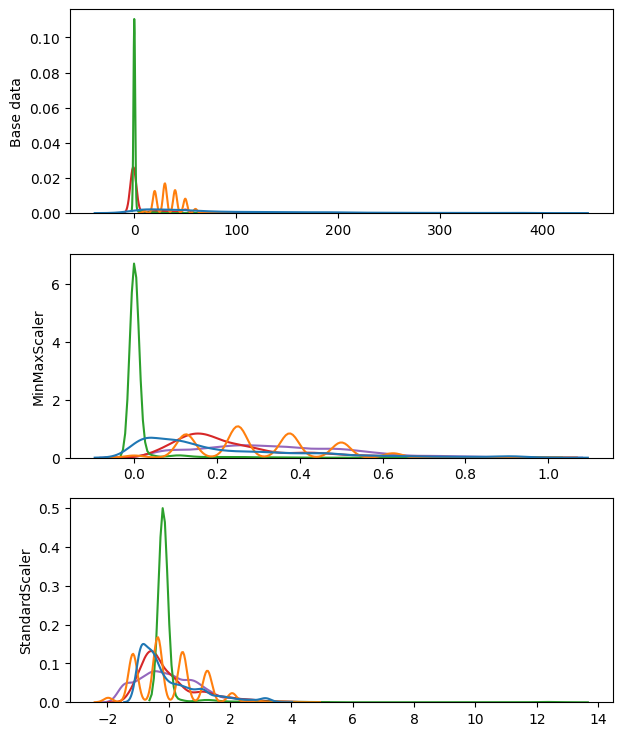

In [23]:
plt.figure(figsize=(7, 9))
plt.subplot(3,1,1)
sns.kdeplot(data=fraud.iloc[:,2:7], legend=None)
plt.ylabel("Base data")

plt.subplot(3,1,2)
sns.kdeplot(data=fraud_minmax.iloc[:,2:7], legend=None)
plt.ylabel("MinMaxScaler")

plt.subplot(3,1,3)
sns.kdeplot(data=fraud_scaled.iloc[:,2:7], legend=None)
plt.ylabel("StandardScaler");

#### Principal Component Analysis menggunakan library [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [26]:
fraud_scaled.shape[1]

22

In [27]:
# inisialisasi objek PCA
pca = PCA(n_components = fraud_scaled.shape[1], # jumlah pca yang dihasilkan
          svd_solver='full') # implementasi full svd sehingga mendapatkan semua PC yang terbentuk

pca.fit(fraud_scaled) # menghitung PCA

PCA(n_components=22, svd_solver='full')

**[additional] Note:** jika kita perhatikan bagian dokumentasi pada library scikit-learn, fungsi PCA menggunakan [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) sebagai reduksi dimensi linearnya. Output yang dihasilkan akan tetap sama dengan menggunakan dekomposisi eigen (mencari eigen vector dan eigen value), tetapi komputasi numeriknya lebih stabil dan efisien.

<div class="alert alert-block alert-success">
<b>&#128250; Rekomendasi Video:</b> <a href="https://www.youtube.com/watch?v=DQ_BkPHIl-g" class="button large hpbottom">hubungan PCA dengan SVD </a>
</div>


In [28]:
# menampilkan banyaknya PC yang terbentuk dengan n_components_
pca.n_components_

22

`pca.components_` : berisi nilai *eigen vector* yang akan dijadikan formula untuk PC baru

In [30]:
pca.components_[0:2]

array([[-0.15819311,  0.0417231 , -0.03129937, -0.1123544 ,  0.04290291,
         0.2351946 ,  0.35391377,  0.41522313,  0.47969934,  0.02191433,
         0.24031473, -0.23082762,  0.04977322, -0.08095636,  0.01647102,
        -0.06015417, -0.09132805,  0.0055828 ,  0.07717537,  0.04250296,
         0.03754314, -0.48240979],
       [ 0.13535264,  0.01030674,  0.30908342,  0.43077826, -0.10807519,
         0.05947211,  0.12556664,  0.16248004,  0.18705352,  0.08442346,
        -0.28152504,  0.38222159, -0.00967381,  0.2000844 , -0.23570284,
         0.16375222,  0.44214473,  0.02387019,  0.0436091 , -0.11801707,
         0.07118486, -0.19016896]])

In [31]:
# opsional
pd.DataFrame(pca.components_.T, # dibalik/transpose agar representasi tiap pca menjadi kolom, bukan baris
             columns=pca.get_feature_names_out()) # ambil nama kolom tiap pca

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  -0.158193  0.135353 -0.162306  0.134508 -0.312684 -0.108824  0.367066   
1   0.041723  0.010307 -0.108968 -0.358470  0.444157  0.216071  0.080471   
2  -0.031299  0.309083  0.123176 -0.146451  0.209773  0.240440 -0.090738   
3  -0.112354  0.430778  0.228386  0.204505 -0.017963 -0.194369  0.195797   
4   0.042903 -0.108075  0.032234  0.224078  0.170119 -0.182808  0.496507   
5   0.235195  0.059472 -0.030059  0.054425  0.032055  0.063801 -0.141649   
6   0.353914  0.125567  0.033460 -0.047929 -0.053546  0.014523  0.156072   
7   0.415223  0.162480  0.000049 -0.020837 -0.033986 -0.007583  0.107320   
8   0.479699  0.187054 -0.040099  0.005710 -0.037254 -0.072465  0.023141   
9   0.021914  0.084423  0.130765 -0.097963 -0.119157  0.145267  0.279656   
10  0.240315 -0.281525 -0.296241 -0.188222 -0.149142  0.070441 -0.204782   
11 -0.230828  0.382222 -0.446875 -0.032202  0.083457 -0.084291 -0.056956   
12  0.049773 -0.009674 -0.051346  0.313814 -0.338790 -0.285945 -0.314286   
13 -0.080956  0.200084  0.440016 -0.291442 -0.126254 -0.131275 -0.168212   
14  0.016471 -0.235703 -0.379541  0.112789 -0.044502  0.140387  0.306921   
15 -0.060154  0.163752 -0.021240 -0.253441 -0.488725  0.348785  0.157856   
16 -0.091328  0.442145 -0.457573 -0.036415  0.128579 -0.079334 -0.095635   
17  0.005583  0.023870 -0.108374  0.122686 -0.071027 -0.110816 -0.328832   
18  0.077175  0.043609  0.062668  0.415692  0.348378  0.123957 -0.055213   
19  0.042503 -0.118017  0.013202 -0.309374  0.226441 -0.622822  0.107508   
20  0.037543  0.071185  0.131232  0.377977  0.119418  0.320217 -0.086743   
21 -0.482410 -0.190169  0.045057 -0.003288  0.042527  0.070425 -0.015414   

        pca7      pca8      pca9  ...     pca12     pca13     pca14     pca15  \
0  -0.115806  0.151542 -0.091228  ... -0.169887 -0.462555 -0.223370  0.468175   
1  -0.073306  0.121770  0.379810  ... -0.389315 -0.073886 -0.511654 -0.003581   
2   0.230574 -0.148989 -0.308531  ...  0.281142  0.008033 -0.071138  0.595978   
3   0.064200 -0.069241 -0.081269  ... -0.245782  0.015440 -0.041139 -0.226902   
4  -0.253605  0.275001  0.086788  ...  0.226162  0.057900  0.031015 -0.009512   
5   0.216516 -0.098747 -0.251218  ... -0.477376 -0.386764  0.187384 -0.151027   
6  -0.106513 -0.011884  0.016287  ...  0.149678  0.190870 -0.082547  0.110373   
7  -0.054366  0.027949 -0.010868  ...  0.098014  0.070172 -0.061584 -0.034323   
8  -0.017965  0.002053 -0.027925  ... -0.026734 -0.051108 -0.000364 -0.019518   
9   0.716483  0.159175  0.283104  ...  0.218071  0.008720 -0.049973 -0.160614   
10 -0.112244  0.115893  0.083139  ...  0.118137 -0.103452  0.130028  0.178404   
11 -0.042052 -0.007921  0.072458  ...  0.070264  0.073350  0.095640 -0.091133   
12  0.140134 -0.290031  0.453978  ... -0.062835  0.156782 -0.339921  0.198418   
13 -0.130771  0.167325  0.198475  ... -0.099390  0.002693  0.071939  0.183312   
14  0.312159 -0.129272 -0.108829  ... -0.234497  0.276183  0.022427  0.167376   
15 -0.143634  0.106467  0.170852  ... -0.267239  0.249823  0.370681  0.041450   
16 -0.044247 -0.011815  0.089516  ...  0.125843  0.087597  0.094966 -0.078094   
17  0.223096  0.807207 -0.196460  ... -0.047816  0.097335 -0.123975  0.003781   
18  0.073523  0.108115  0.470067  ... -0.059835 -0.196610  0.496672  0.284025   
19  0.171116 -0.011001 -0.066728  ... -0.276159  0.310163  0.245413  0.262667   
20 -0.168419  0.079564 -0.151309  ... -0.252264  0.500744 -0.126601  0.111468   
21  0.028346  0.007481  0.008221  ...  0.008739  0.034521  0.019334  0.025410   

       pca16     pca17     pca18     pca19     pca20     pca21  
0   0.078315  0.041306 -0.094755 -0.027715  0.037937 -0.006545  
1  -0.017870  0.084177  0.060012  0.026866 -0.004626  0.006357  
2  -0.093449  0.145998  0.073793  0.076624 -0.035756 -0.003970  
3  -0.160376  0.023602  0.573853  0.333451  0.013822  0.004340  
4  -0.034502 -0.025168  0.024070  0.020534 -0.014930 -0.007918  
5   0

Melihat proporsi nilai informasi yang dapat ditangkap untuk setiap PC dengan atribut `explained_variance_ratio_`:

In [32]:
# menampilkan banyaknya PC yang terbentuk dengan explained_variance_ratio
pca.explained_variance_ratio_

array([0.1376811 , 0.09104272, 0.06854404, 0.05763219, 0.05041625,
       0.04800417, 0.04643708, 0.04563752, 0.04525991, 0.04340626,
       0.0428812 , 0.0418975 , 0.04056786, 0.03994442, 0.03862271,
       0.0349525 , 0.03072321, 0.02931932, 0.02269744, 0.02195474,
       0.01515074, 0.00722711])

In [33]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

Melihat kumulatif proporsi nilai informasi yang dapat ditangkap untuk setiap penambahan PC: 

In [40]:
cummulative = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

**Note:** 

- Proportion of Variance: informasi yang ditangkap oleh tiap PC
- Cumulative Proportion: jumlah informasi yang ditangkap secara kumulatif dari PC0 hingga PC tersebut

Untuk lebih jelasnya, kita dapat mengeluarkan Cumulative Proportion di atas menggunakan plot di bawah ini.

In [41]:
# Hitung proporsi variasi yang dijelaskan oleh setiap komponen utama
explained_var_ratio = pca.explained_variance_ratio_

# Buat scree plot menggunakan plotly
fig = go.Figure()

# Plot proporsi variasi yang dijelaskan
fig.add_trace(go.Scatter(x=list(range(1, len(cummulative) + 1)), 
                         y=cummulative, mode='lines+markers', 
                         name='Explained Variance Ratio'))

# Atur layout dan tampilkan
fig.update_layout(title='Scree Plot',
                  xaxis_title='Principal Component (PC)',
                  yaxis_title='Explained Variance Ratio',
                  showlegend=True,
                  width=800, height=620)

pyo.iplot(fig, 'Scree')

**Transform PCA**

Menampilkan nilai di setiap PC pada dimensi baru

In [38]:
transform_ = pd.DataFrame(pca.transform(fraud_scaled), 
                          columns=pca.get_feature_names_out())
transform_.head()

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   
3 -1.170206 -1.354921  0.214172  0.544212 -0.430262 -1.025455  0.577854   
4  2.863529 -0.685988 -1.073506  0.277979  0.633735  1.345577 -0.185201   

       pca7      pca8      pca9  ...     pca12     pca13     pca14     pca15  \
0  1.645738 -0.358602 -1.415333  ... -0.010943 -0.166878  1.618416 -1.197033   
1 -0.714205 -0.032657  0.495306  ... -1.283505 -0.849027 -1.081769  0.575271   
2 -1.175479  0.130690  0.395665  ...  1.778190 -0.175649 -0.805700  0.712865   
3  0.157622 -0.686719 -0.321691  ... -0.210811  0.218148 -1.013061  0.797674   
4 -0.179568  0.056330 -0.486255  ... -1.208754 -2.206490  0.492851 -0.771684   

      pca16     pca17     pca18     pca19     pca20     pca21  
0  0.566608 -0.024353  0.618783  0.375513  0.640663  0.104169  
1  0.610764  0.838708 -0.767361  0.647746  0.753357 -0.299315  
2 -0.890682 -0.092477  1.876653  1.556919  0.068522 -0.214564  
3  0.574951  0.648317 -0.260750 -0.822729  0.407137  0.098307  
4  0.585018 -0.560976 -0.059917 -0.812174 -0.663335 -0.305970  

[5 rows x 22 columns]

In [39]:
transform_.shape

(14900, 22)

<div class="alert alert-block alert-warning">
<b>Diskusi:</b> ketika kita declare value dari `n_components` sama dengan jumlah dari fitur/variabel datasetnya <b>dan</b> kita menggunakan <b>semua</b> PC yang terbentuk, apakah kita sudah melakukan <b>reduksi dimensi</b>?
</div>

> jawaban: belum

Reduksi dimensi dengan mempertahankan at least 90% informasi maka PC dipilih dari 0 sampai 16

In [42]:
fraud_pca = transform_.iloc[:, :17]
fraud_pca.head()

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   
3 -1.170206 -1.354921  0.214172  0.544212 -0.430262 -1.025455  0.577854   
4  2.863529 -0.685988 -1.073506  0.277979  0.633735  1.345577 -0.185201   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.645738 -0.358602 -1.415333 -0.624414  0.677698 -0.010943 -0.166878   
1 -0.714205 -0.032657  0.495306  0.829078  0.269277 -1.283505 -0.849027   
2 -1.175479  0.130690  0.395665 -0.344746  0.218384  1.778190 -0.175649   
3  0.157622 -0.686719 -0.321691  0.114822 -0.708565 -0.210811  0.218148   
4 -0.179568  0.056330 -0.486255 -0.124916  0.362843 -1.208754 -2.206490   

      pca14     pca15     pca16  
0  1.618416 -1.197033  0.566608  
1 -1.081769  0.575271  0.610764  
2 -0.805700  0.712865 -0.890682  
3 -1.013061  0.797674  0.574951  
4  0.492851 -0.771684  0.585018

> **Notes**: Setelah dipilih PC yang merangkum informasi yang dibutuhkan, PC dapat digabung dengan data awal dan digunakan untuk analisis lebih lanjut (misal: supervised learning).

Cara yang dilakukan di atas adalah cara manual, sebenarnya kita bisa secara langsung melakukan reduksi dimensi ketika membuat objek PCA yaitu menuliskan proporsi informasi yang ingin dipertahankan pada parameter `n_components`.

Kekurangan dari cara ini adalah kita tidak bisa melakukan detransform ke bentuk awal karena adanya informasi yang hilang.

In [43]:
pca2 = PCA(n_components = 0.9, # gunakan proporsi informasi yang ingin dipertahankan
          svd_solver='full')
pca2.fit(fraud_scaled.values)

fraud_pca90 = pd.DataFrame(pca2.fit_transform(fraud_scaled), 
                          columns=pca2.get_feature_names_out())

fraud_pca90.head()

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   
3 -1.170206 -1.354921  0.214172  0.544212 -0.430262 -1.025455  0.577854   
4  2.863529 -0.685988 -1.073506  0.277979  0.633735  1.345577 -0.185201   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.645738 -0.358602 -1.415333 -0.624414  0.677698 -0.010943 -0.166878   
1 -0.714205 -0.032657  0.495306  0.829078  0.269277 -1.283505 -0.849027   
2 -1.175479  0.130690  0.395665 -0.344746  0.218384  1.778190 -0.175649   
3  0.157622 -0.686719 -0.321691  0.114822 -0.708565 -0.210811  0.218148   
4 -0.179568  0.056330 -0.486255 -0.124916  0.362843 -1.208754 -2.206490   

      pca14     pca15     pca16  
0  1.618416 -1.197033  0.566608  
1 -1.081769  0.575271  0.610764  
2 -0.805700  0.712865 -0.890682  
3 -1.013061  0.797674  0.574951  
4  0.492851 -0.771684  0.585018

In [44]:
pca2.n_components_

17

In [46]:
len(pca2.components_)

17

**[optional] Detransform PCA**

Mengembalikan hasil reduksi dimensi menjadi data bentuk aslinya. Tetapi hal ini hanya bisa dilakukan pada data hasil PCA yang masih lengkap.

In [48]:
pd.DataFrame(pca.inverse_transform(transform_),
            columns = fraud_scaled.columns).head()

income name_email_similarity current_address_months_count customer_age  \
0 -1.617461             -1.406485                    -0.463121    -0.353717   
1  1.129349              1.401910                    -0.316152    -1.161812   
2  0.099295             -0.377142                    -0.214405    -0.353717   
3  1.129349             -0.273965                    -0.282236    -0.353717   
4  0.099295              0.815273                    -0.881417    -1.161812   

  days_since_request zip_count_4w velocity_6h velocity_24h velocity_4w  \
0          -0.183422     1.914726   -0.109015    -0.159213   -0.130894   
1          -0.180966     1.279767    0.831844     1.856551    0.530621   
2           0.947517    -1.166930    0.664322     1.077426    0.628074   
3          -0.183795    -0.792364    0.270014    -0.921763   -0.653084   
4          -0.178846     2.960306    0.731904     0.278006    1.180475   

  bank_branch_count_8w  ... email_is_free phone_home_valid phone_mobile_valid  \
0             1.064934  ...     -1.087580        -0.817867           0.363856   
1            -0.367800  ...      0.919473        -0.817867           0.363856   
2            -0.391428  ...      0.919473        -0.817867           0.363856   
3            -0.391428  ...      0.919473        -0.817867           0.363856   
4            -0.395724  ...     -1.087580        -0.817867           0.363856   

  has_other_cards proposed_credit_limit foreign_request  \
0       -0.520999              -0.68135       -0.172179   
1        1.919391              -0.68135       -0.172179   
2       -0.520999              -0.68135       -0.172179   
3       -0.520999              -0.68135       -0.172179   
4       -0.520999              -0.68135       -0.172179   

  session_length_in_minutes keep_alive_session device_distinct_emails_8w  \
0                 -0.301415           0.887976                 -0.149544   
1                 -0.456308          -1.126157                 -0.149544   
2                 -0.471254          -1.126157                 -0.149544   
3                 -0.543402           0.887976                 -0.149544   
4                  0.831392          -1.126157                 -0.149544   

      month  
0  0.319350  
1 -1.036425  
2 -1.036425  
3  0.771275  
4 -1.488350  

[5 rows x 22 columns]

In [49]:
fraud_scaled.head()

income name_email_similarity current_address_months_count customer_age  \
0 -1.617461             -1.406485                    -0.463121    -0.353717   
1  1.129349              1.401910                    -0.316152    -1.161812   
2  0.099295             -0.377142                    -0.214405    -0.353717   
3  1.129349             -0.273965                    -0.282236    -0.353717   
4  0.099295              0.815273                    -0.881417    -1.161812   

  days_since_request zip_count_4w velocity_6h velocity_24h velocity_4w  \
0          -0.183422     1.914726   -0.109015    -0.159213   -0.130894   
1          -0.180966     1.279767    0.831844     1.856551    0.530621   
2           0.947517    -1.166930    0.664322     1.077426    0.628074   
3          -0.183795    -0.792364    0.270014    -0.921763   -0.653084   
4          -0.178846     2.960306    0.731904     0.278006    1.180475   

  bank_branch_count_8w  ... email_is_free phone_home_valid phone_mobile_valid  \
0             1.064934  ...     -1.087580        -0.817867           0.363856   
1            -0.367800  ...      0.919473        -0.817867           0.363856   
2            -0.391428  ...      0.919473        -0.817867           0.363856   
3            -0.391428  ...      0.919473        -0.817867           0.363856   
4            -0.395724  ...     -1.087580        -0.817867           0.363856   

  has_other_cards proposed_credit_limit foreign_request  \
0       -0.520999              -0.68135       -0.172179   
1        1.919391              -0.68135       -0.172179   
2       -0.520999              -0.68135       -0.172179   
3       -0.520999              -0.68135       -0.172179   
4       -0.520999              -0.68135       -0.172179   

  session_length_in_minutes keep_alive_session device_distinct_emails_8w  \
0                 -0.301415           0.887976                 -0.149544   
1                 -0.456308          -1.126157                 -0.149544   
2                 -0.471254          -1.126157                 -0.149544   
3                 -0.543402           0.887976                 -0.149544   
4                  0.831392          -1.126157                 -0.149544   

      month  
0  0.319350  
1 -1.036425  
2 -1.036425  
3  0.771275  
4 -1.488350  

[5 rows x 22 columns]

**Contoh aplikasi PCA (bahasa pemrograman R):**

- sebagai metode untuk mengurangi multikolinearitas: [rpubs](https://rpubs.com/tomytjandra/PCA-reduce-multicollinearity)
- sebagai input untuk model klasifikasi: [rpubs](https://rpubs.com/tomytjandra/PCA-before-classification)

Mari kita coba bandingkan bagaimana kondisi covariance data kita sebelum discaling, sesudah scaling, dan setelah menjadi bentuk PCA. Silakan jalankan kode berikut ini.

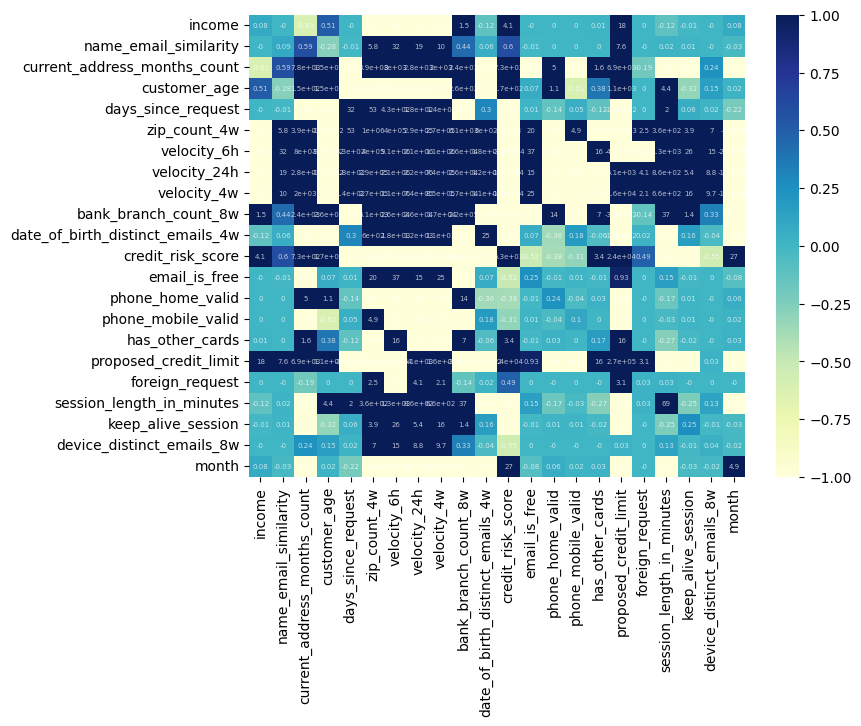

In [50]:
# alternatif menggunakan seaborn heatmap, sebelum dilakukan scaled

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(fraud_num.cov().round(2), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', 
            annot_kws={"size": 5, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'});

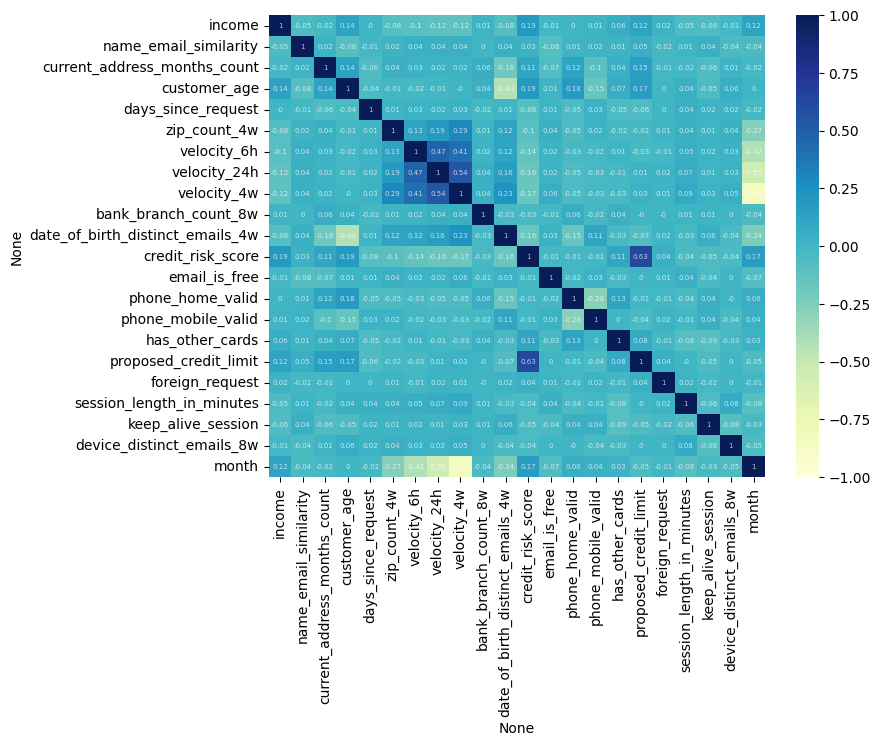

In [51]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(fraud_scaled.cov().round(2), vmin=-1, vmax=1, annot=True, cmap='YlGnBu',
            annot_kws={"size": 5, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'});

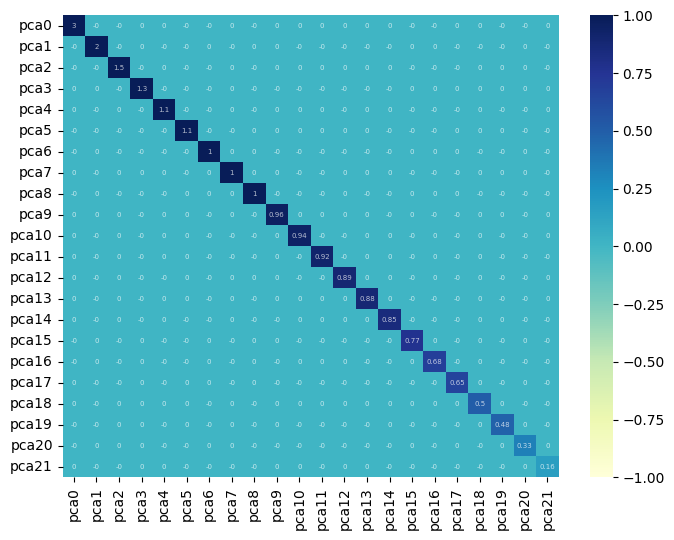

In [52]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(transform_.cov().round(2), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', 
            annot_kws={"size": 5, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'});

## Visualizing PCA

PCA tidak hanya berguna untuk dimensionality reduction namun baik untuk visualisasi high-dimensional data. Visualisasi dapat menggunakan **biplot** yang menampilkan:

1. **Individual factor map**, yaitu sebaran data secara keseluruhan menggunakan 2 PC. Tujuannya untuk:
  - observasi yang serupa
  - outlier dari keseluruhan data
2. **Variables factor map**, yaitu plot yang menunjukkan korelasi antar variable dan kontribusinya terhadap PC.

### Biplot Visualization

Kita akan menggunakan fungsi custom dari helper yaitu `biplot_pca`.

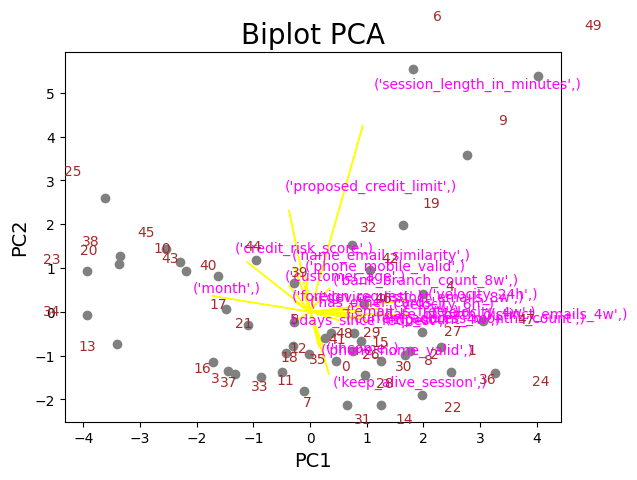

In [53]:
# method dari helper.py
biplot_pca(fraud_scaled[0:50])

Keterangan:

- **Titik/poin observasi:**
    + index angka dari observasi.
    + Semakin berdekatan maka karakteristiknya semakin mirip, sedangkan yang jauh dari gerombolan data dianggap sebagai outlier
    
- **Garis vektor:**
    + loading score, menunjukkan kontribusi variabel tersebut terhadap PC, atau banyaknya informasi variabel tersebut yang dirangkum oleh PC.
    + Semakin jauh panah, semakin banyak informasi yang dirangkum.

Visualisasi biplot (loadings) menggunakan library [plotly](https://plotly.com/python/pca-visualization/#visualize-loadings). Fungsi ini merupakan fungsi custom yang dapat dilihat pada file `helper.py`.

In [74]:
fraud_scaled.columns

MultiIndex([(                          'income',),
            (           'name_email_similarity',),
            (    'current_address_months_count',),
            (                    'customer_age',),
            (              'days_since_request',),
            (                    'zip_count_4w',),
            (                     'velocity_6h',),
            (                    'velocity_24h',),
            (                     'velocity_4w',),
            (            'bank_branch_count_8w',),
            ('date_of_birth_distinct_emails_4w',),
            (               'credit_risk_score',),
            (                   'email_is_free',),
            (                'phone_home_valid',),
            (              'phone_mobile_valid',),
            (                 'has_other_cards',),
            (           'proposed_credit_limit',),
            (                 'foreign_request',),
            (       'session_length_in_minutes',),
            (              'kee

In [73]:
pca.components_[0]

array([-0.15819311,  0.0417231 , -0.03129937, -0.1123544 ,  0.04290291,
        0.2351946 ,  0.35391377,  0.41522313,  0.47969934,  0.02191433,
        0.24031473, -0.23082762,  0.04977322, -0.08095636,  0.01647102,
       -0.06015417, -0.09132805,  0.0055828 ,  0.07717537,  0.04250296,
        0.03754314, -0.48240979])

In [75]:
pca.components_[1]

array([ 0.13535264,  0.01030674,  0.30908342,  0.43077826, -0.10807519,
        0.05947211,  0.12556664,  0.16248004,  0.18705352,  0.08442346,
       -0.28152504,  0.38222159, -0.00967381,  0.2000844 , -0.23570284,
        0.16375222,  0.44214473,  0.02387019,  0.0436091 , -0.11801707,
        0.07118486, -0.19016896])

In [54]:
biplot_plotly(fraud_scaled, pca)

#### Individual

1. **Outlier detection**: observasi yang jauh dari kumpulan observasi lainnya mengindikasikan outlier dari keseluruhan data. Observasi ini dapat ditandai untuk nantinya dicek karakteristik datanya untuk keperluan bisnis, atau apakah mempengaruhi performa model, dll.


2. **Observasi searah panah** mengindikasikan observasi tersebut nilainya tinggi pada variabel tersebut. Bila bertolak belakang, maka nilainya rendah pada variable tersebut.


3. **Observasi berdekatan**: observasi yang saling berdekatan memiliki karakteristik yang mirip.

In [61]:
fraud_pca.iloc[[6, 9, 49, 50],:]

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
23 -3.695961  0.448615 -1.742389 -0.786697  0.312454  0.329121  0.997451   
4   2.863529 -0.685988 -1.073506  0.277979  0.633735  1.345577 -0.185201   

        pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
23 -0.399565  0.314671  0.189877 -0.124195 -0.163166 -1.368597  0.242628   
4  -0.179568  0.056330 -0.486255 -0.124916  0.362843 -1.208754 -2.206490   

       pca14     pca15     pca16  
23  1.000849 -0.139654  0.196192  
4   0.492851 -0.771684  0.585018

In [62]:
fraud_num.iloc[[23, 4]]

income  name_email_similarity  current_address_months_count  customer_age  \
23     0.9               0.720275                          47.0            40   
4      0.6               0.720006                          11.0            20   

    days_since_request  zip_count_4w  velocity_6h  velocity_24h  velocity_4w  \
23            0.025575          1124   814.939537   3135.137821  3039.695080   
4             0.032629          4527  7852.258962   5177.826213  5942.104901   

    bank_branch_count_8w  ...  email_is_free  phone_home_valid  \
23                     7  ...              0                 0   
4                      0  ...              0                 0   

    phone_mobile_valid  has_other_cards  proposed_credit_limit  \
23                   1                1                 1500.0   
4                    1                0                  200.0   

    foreign_request  session_length_in_minutes  keep_alive_session  \
23                0                   7.989059                   1   
4                 0                  14.626874                   0   

    device_distinct_emails_8w  month  
23                        1.0      7  
4                         1.0      0  

[2 rows x 22 columns]

In [64]:
fraud_num.iloc[[42, 50, 46]]

income  name_email_similarity  current_address_months_count  customer_age  \
42     0.6               0.500283                          46.0            30   
50     0.2               0.879521                         114.0            20   
46     0.3               0.207968                         168.0            30   

    days_since_request  zip_count_4w  velocity_6h  velocity_24h  velocity_4w  \
42            0.022304          1543  6404.056253   6746.502449  5620.863159   
50            0.046187          3450  7061.662258   5323.850796  5090.300148   
46            0.029153          1332  3674.760361   5776.217510  6275.300174   

    bank_branch_count_8w  ...  email_is_free  phone_home_valid  \
42                     2  ...              1                 0   
50                     0  ...              0                 1   
46                    11  ...              1                 0   

    phone_mobile_valid  has_other_cards  proposed_credit_limit  \
42                   1                1                 1000.0   
50                   0                0                  200.0   
46                   1                0                 1000.0   

    foreign_request  session_length_in_minutes  keep_alive_session  \
42                0                   9.943178                   0   
50                0                   6.554054                   0   
46                0                   9.998810                   1   

    device_distinct_emails_8w  month  
42                        2.0      2  
50                        1.0      3  
46                        1.0      0  

[3 rows x 22 columns]

####  Variable

**Korelasi antar variabel** dapat dilihat dari sudut antar panah: 

- Panah saling berdekatan (sudut antar panah < 90), maka korelasi positif
- Panah saling tegak lurus (sudut antar panah = 90), maka tidak berkorelasi
- Panah saling bertolak belakang (sudut antar panah mendekati 180), maka korelasi negatif

**Variable Importance**

Selain melihat berdasarkan variable factor map, kita juga dapat memetakan 

In [65]:
# Dapatkan loadings dari PCA
loadings = pca.components_

# Buat dataframe untuk loadings
loadings_df = pd.DataFrame(data=loadings.T, 
                           columns=pca.get_feature_names_out())

# Tambahkan kolom nama variabel
loadings_df['Variable'] = fraud_scaled.columns

# Tampilkan loadings yang signifikan (misalnya, absolute loadings > 0.3)
significant_loadings = loadings_df[abs(loadings_df['pca0']) > 0.2]
significant_loadings

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
5   0.254536 -0.184049 -0.052353  0.048724  0.181880  0.553324 -0.406133   
6   0.278197 -0.167477 -0.065016 -0.001018  0.019048 -0.250079  0.144120   
7   0.418412 -0.175674  0.032164 -0.015764  0.094908 -0.016151  0.174177   
8   0.422678 -0.161588 -0.076163 -0.011424  0.126181 -0.093132  0.015535   
10  0.328022  0.285483  0.169881 -0.030157 -0.058191  0.270602 -0.033609   
11 -0.264609 -0.239203  0.203804  0.202757  0.252504 -0.128731 -0.084717   
21 -0.437990  0.118262  0.077484 -0.032829 -0.126963  0.036287 -0.031599   

        pca7      pca8      pca9  ...     pca13     pca14     pca15     pca16  \
5   0.319775  0.330375  0.055199  ... -0.171046 -0.024820  0.163752  0.043083   
6  -0.034537 -0.181518 -0.292714  ... -0.173220  0.020450 -0.039390  0.539321   
7   0.001748 -0.106125  0.004612  ...  0.065990  0.036640 -0.163368  0.214036   
8  -0.075685 -0.067948 -0.070653  ...  0.148771  0.146961  0.088360 -0.470691   
10  0.131475 -0.202543 -0.016625  ...  0.330536 -0.206888  0.101545  0.303949   
11  0.187801 -0.378717  0.071309  ...  0.024587  0.228687  0.114639  0.105978   
21  0.127081  0.100576  0.135952  ...  0.024086 -0.055217 -0.087107  0.224116   

       pca17     pca18     pca19     pca20     pca21  \
5  -0.031187 -0.092707  0.033165  0.092057 -0.016102   
6  -0.439740 -0.138476  0.152361  0.048419 -0.144075   
7   0.616769  0.294909 -0.002323 -0.278603  0.064113   
8   0.017705 -0.203896  0.094607  0.063541 -0.619253   
10  0.032425  0.101370 -0.003186  0.017381 -0.069864   
11  0.391262 -0.294474  0.002183  0.367030  0.034964   
21  0.141136  0.149134  0.211955 -0.169378 -0.702388   

                               Variable  
5                       (zip_count_4w,)  
6                        (velocity_6h,)  
7                       (velocity_24h,)  
8                        (velocity_4w,)  
10  (date_of_birth_distinct_emails_4w,)  
11                 (credit_risk_score,)  
21                             (month,)  

[7 rows x 23 columns]

## Pros and Cons PCA

Kelebihan melakukan PCA:

- Beban komputasi apabila dilakukan pemodelan relatif lebih rendah
- Bisa jadi salah satu teknik untuk improve model, namun tidak selalu menjadi lebih baik
- Mengurangi resiko terjadinya multikolinearitas, karena nilai antar PC sudah tidak saling berkorelasi

Kekurangan melakukan PCA (sebelum pemodelan):

- Model tidak dapat diinterpretasikan, karena nilai PC merupakan campuran dari beberapa variabel

# Anomaly Detection

## Local Outlier Factor with PyOD

**Local Outlier Factor** (LOF) merupakan salah satu algoritma umum yang digunakan untuk kasus anomaly detection. Teknik ini bekerja dengan menghitung skor berdasarkan kepadatan data berdasarkan jaraknya (sangat mirip dengan konsep k-NN). 

LOF dapat menjadi pilihan yang baik untuk deteksi fraud dalam menentukan anomali data, berikut adalah beberapa kelebihan dan kekurangan dari metode ini.

**Pros**

- Efektif dalam menemukan outlier lokal: LOF dapat mengidentifikasi outlier yang tidak dapat ditemukan oleh metode global, seperti outlier yang berada di dalam cluster yang padat.
- Tidak sensitif terhadap distribusi data: LOF dapat bekerja dengan baik pada data dengan distribusi yang tidak normal.
- Mudah diimplementasikan: LOF dapat diimplementasikan dengan mudah menggunakan library Python seperti Pyod.

**Cons**

- Dapat menjadi lambat untuk data yang besar: LOF memerlukan komputasi yang cukup berat untuk dataset yang besar.
- Memerlukan pemilihan parameter yang tepat: Parameter k (jumlah tetangga terdekat) yang digunakan dalam LOF dapat mempengaruhi hasil deteksi outlier.

Secara sederhana, LOF akan menghitung jarak antar data dan data yang secara kumpulan lokal terisolasi akan didefinisikan sebagai outlier oleh LOF. Berikut adalah ilustrasi sederhana dari kumpulan data dalam ruang 2 dimensi secara lokal.

![LOF2](assets/lof2.jpg)

Pada ilustrasi di atas, C1 dan C2 merupakan kumpulan data lokal. Titik yang diperhatikan adalah O1, O2, O3, dan O4. 

Pada kasus kita ini O1 dan O2 dapat dianggap sebagai outlier lokal untuk kelompok C1. Sementara O4 kemungkinan bukan merupakan outlier untuk kelompok C2 karena rentang jarak per data di kelompok C2 cukup renggang/tidak sepadat C1. Sementara O3 dapat dikatakan sebagai outlier global.

Kita akan menggunakan data hasil PCA yaitu `fraud_pca90` untuk mencoba metode ini.

In [76]:
fraud_pca90.head(3)

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.645738 -0.358602 -1.415333 -0.624414  0.677698 -0.010943 -0.166878   
1 -0.714205 -0.032657  0.495306  0.829078  0.269277 -1.283505 -0.849027   
2 -1.175479  0.130690  0.395665 -0.344746  0.218384  1.778190 -0.175649   

      pca14     pca15     pca16  
0  1.618416 -1.197033  0.566608  
1 -1.081769  0.575271  0.610764  
2 -0.805700  0.712865 -0.890682


Fungsi `LOF()` dapat digunakan setelah mengakses modul `models.lof` dari library `pyod`.

In [78]:
from pyod.models.lof import LOF

In [79]:
lof_model = LOF()

Objek LOF di atas dapat langsung kita gunakan kepada data yang sudah kita olah sebelumnya menggunakan method `fit_predict()`.

In [80]:
lof_label = lof_model.fit_predict(fraud_pca90)
lof_label

array([0, 0, 1, ..., 0, 1, 0])

Karena merupakan proses unsupervised, maka metode fit_predict akan langsung menghasilkan label. Tetapi sebenarnya terdapat skor anomali untuk setiap data yang dimasukkan ke model. Skor anomali ini dapat dilihat menggunakan method `decision_function()`.

In [81]:
# Menghitung nilai LOF
lof_scores = lof_model.decision_function(fraud_pca90)

lof_scores

array([1.18030495, 1.11967908, 1.19635871, ..., 0.98605162, 1.51835373,
       1.12362949])

Karena merupakan skor setiap data, maka untuk lebih jelasnya kita bisa lihat distribusinya menggunakan histogram ataupun boxplot.

<Axes: >

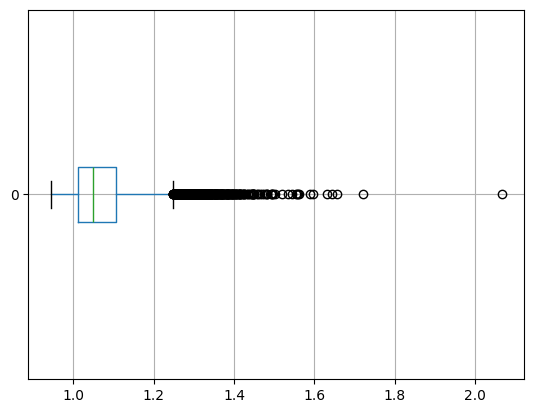

In [84]:
pd.DataFrame(lof_scores).boxplot(vert=False)

Sementara untuk label, kita dapat dengan mudah menghitung masing-masing hasil label menggunakan `value_counts()`.

In [86]:
pd.Series(lof_label).value_counts(normalize=True)

0    0.9
1    0.1
Name: proportion, dtype: float64

## Parameter on LOF Model

Objek model LOF memiliki beberapa parameter yang dapat kita gunakan, parameter yang paling umum digunakan adalah:

- `contamination`: mengatur proporsi estimasi anomali pada data (default = 0.1)
- `n_neighbors`: jumlah tetangga yang dianggap sebagai 1 kluster (default = 20)
- `metrics`: metode perhitungan jarak yang digunakan

<!-- Selain itu kita juga dapat mengatur metode perhitungan jarak yang digunakan dengan parameter `metric`. -->

Nilai contamination ini dapat kita isi disesuaikan dengan kasus yang ada, contoh:

> Apabila kita ketahui terdapat 1% akun bank BRI merupakan akun yang digunakan untuk penipuan maka kita dapat menggunakan nilai `contamination = 0.01`.

In [93]:
lof_tune = LOF(
    contamination = 0.005,
    n_neighbors = 15
)

lof_label_tune = lof_tune.fit_predict(fraud_pca90)

Mari kita lihat dampak penggunaan parameter contamination dari jumlah anomali yang dideteksi oleh model kita.

In [101]:
pd.Series(lof_label_tune).value_counts()

0    14825
1       75
Name: count, dtype: int64

Selain melihat plot distribusinya, kita dapat menampilkan persebaran outlier kita pada bidang 2 dimensi hasil PCA. Berikut adalah kodenya:

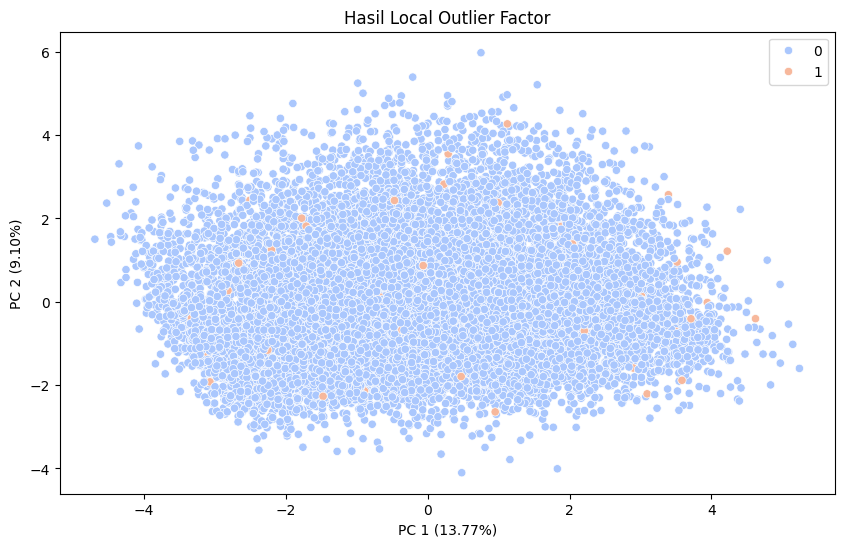

In [95]:
# menampilkan plot anomali (___ diisi dengan nama dataframe PCA)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fraud_pca90['pca0'], 
                y=fraud_pca90['pca1'], 
                hue=lof_label_tune,
                palette='coolwarm')
plt.title('Hasil Local Outlier Factor')
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)');

Atau untuk lebih jelasnya, kita dapat menggunakan fungsi scatter dari `plotly.express` untuk mengatur posisi legend yang ingin kita lihat.

In [96]:
# masukkan nama dataframe PCA ke ___
fraud_pca90["color"] = lof_label_tune.astype(str)

# Plot hasil LOF menggunakan Plotly Express
fig = px.scatter(fraud_pca90.sort_values("color"), 
                 x='pca0', y='pca1', color="color",
                 color_discrete_map={'0': '#a6c4ff', '1': '#ffa07a'},
                 title='LOF Results',
                 labels={'pca0': f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)',
                         'pca1': f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)'})

# Menampilkan plot
fig.update_layout(width=800, height=600)
fig.show()

Untuk melihat index data yang terdeteksi anomali, kita bisa menggunakan cara berikut ini.

In [97]:
anomaly_indices = np.where(lof_label_tune == 1)[0]
anomaly_indices

array([  123,   397,   405,   536,   587,  1412,  1447,  1785,  2367,
        2379,  2829,  2857,  2873,  3004,  3223,  3374,  3925,  4280,
        4304,  4405,  4565,  4980,  5030,  5185,  5222,  5322,  5333,
        6059,  6377,  6720,  6864,  7267,  7291,  7323,  7502,  7560,
        7627,  7752,  7828,  8031,  8183,  8506,  8902,  9090,  9198,
        9332,  9475,  9609,  9984, 10059, 10171, 10241, 10373, 10535,
       10787, 10933, 11497, 11667, 11938, 12196, 12332, 13209, 13214,
       13264, 13587, 13841, 13884, 13918, 14113, 14150, 14161, 14209,
       14393, 14438, 14898], dtype=int64)

Kita juga dapat mengambil data yang sifatnya anomali ini menggunakan index yang sudah ditemukan di atas. Dari proses ini kita dapat mentransformasi kembali data kita ke bentuk semula. 

Ingat bahwa kita sebelumnya membuat dua buah pca yaitu pca yang menyimpan seluruh informasi dan pca yang mengambil 90% informasi. Maka kita gunakan pca yang menyimpan seluruh informasi ini setelah itu kita kembalikan ke bentuk sebelum di scaling.

In [99]:
# ambil data yang indexnya terdeteksi anomali
anomaly = transform_.iloc[anomaly_indices]

# inverse pca menjadi data hasil scaling
temp = pd.DataFrame(pca.inverse_transform(anomaly))

# inverse scaling menjadi data normal
anomaly_df = pd.DataFrame(scaler.inverse_transform(temp), 
                          columns=fraud_scaled.columns)

In [104]:
anomaly_df.head()

income name_email_similarity current_address_months_count customer_age  \
0    0.9              0.904449                         34.0         30.0   
1    0.4              0.368311                        343.0         10.0   
2    0.7              0.742771                         16.0         40.0   
3    0.1              0.014002                          4.0         30.0   
4    0.9              0.202449                        189.0         30.0   

  days_since_request zip_count_4w  velocity_6h velocity_24h  velocity_4w  \
0          21.045089       2192.0  5849.358234  4967.871465  5325.041847   
1           0.004115       1688.0  5010.911227  2638.536401  3723.175930   
2          12.952886        168.0  9011.020696  5194.170896  4257.427679   
3           0.015723        491.0  1078.512781  2425.681429  3085.949643   
4          12.543677        701.0  9885.425316  3574.190293  4257.219606   

  bank_branch_count_8w  ... email_is_free phone_home_valid phone_mobile_valid  \
0                  1.0  ...  1.000000e+00     2.275957e-15                0.0   
1               1694.0  ...  1.000000e+00     1.165734e-15                1.0   
2                  5.0  ...  1.000000e+00     1.000000e+00                1.0   
3                  9.0  ... -1.665335e-15     2.220446e-16                1.0   
4                628.0  ...  1.000000e+00     1.000000e+00                1.0   

  has_other_cards proposed_credit_limit foreign_request  \
0   -9.992007e-16                1500.0    3.504141e-16   
1    6.383782e-16                 200.0   -3.434752e-16   
2   -1.942890e-16                 200.0    6.938894e-17   
3    1.221245e-15                1500.0    1.000000e+00   
4   -5.551115e-17                 200.0    2.775558e-17   

  session_length_in_minutes keep_alive_session device_distinct_emails_8w month  
0                  3.941550       1.000000e+00              1.000000e+00   1.0  
1                  2.183412       0.000000e+00              4.440892e-16   5.0  
2                  1.336989       1.000000e+00              1.000000e+00   4.0  
3                  7.259926      -3.663736e-15              2.000000e+00   7.0  
4                  7.902304       1.000000e+00              1.000000e+00   5.0  

[5 rows x 22 columns]

In [107]:
fraud.iloc[anomaly_indices].head()

income  name_email_similarity  current_address_months_count  \
123     0.9               0.904449                          34.0   
397     0.4               0.368311                         343.0   
405     0.7               0.742771                          16.0   
536     0.1               0.014002                           4.0   
587     0.9               0.202449                         189.0   

     customer_age  days_since_request  intended_balcon_amount payment_type  \
123            30           21.045089               -0.616853           AD   
397            10            0.004115               -0.869496           AC   
405            40           12.952886               20.941790           AA   
536            30            0.015723               -0.761342           AB   
587            30           12.543677                7.465069           AA   

     zip_count_4w  velocity_6h  velocity_24h  ...  phone_mobile_valid  \
123          2192  5849.358234   4967.871465  ...                   0   
397          1688  5010.911227   2638.536401  ...                   1   
405           168  9011.020696   5194.170896  ...                   1   
536           491  1078.512781   2425.681429  ...                   1   
587           701  9885.425316   3574.190293  ...                   1   

     has_other_cards  proposed_credit_limit foreign_request    source  \
123                0                 1500.0               0  INTERNET   
397                0                  200.0               0  INTERNET   
405                0                  200.0               0  INTERNET   
536                0                 1500.0               1  INTERNET   
587                0                  200.0               0  INTERNET   

     session_length_in_minutes device_os  keep_alive_session  \
123                   3.941550     other                   1   
397                   2.183412     other                   0   
405                   1.336989       x11                   1   
536                   7.259926   windows                   0   
587                   7.902304     other                   1   

     device_distinct_emails_8w  month  
123                        1.0      1  
397                        0.0      5  
405                        1.0      4  
536                        2.0      7  
587                        1.0      5  

[5 rows x 28 columns]

# Additional Topic

## Saving object to file

In [109]:
from joblib import dump

# simpan object pca
pca = PCA(n_components = fraud_scaled.shape[1],
          svd_solver='full')
pca = pca.fit(fraud_scaled)
dump(pca, "pca_transformer.kevin")

# simpan scaler
scaler = StandardScaler()
scaler = scaler.fit(fraud_num.values)
dump(scaler, "scaler_for_pca")

['scaler_for_pca']

## Load file to object

In [ ]:
from joblib import load

# baca file lalu simpan ke variable
pca_load = load("pca_transformer")
scaler_load = load("scaler_for_pca")

In [110]:
# contoh penggunaan pada data baru
## baca data dan bersihkan sesuai proses yang sudah dilakukan sebelumnya
fraud = pd.read_csv('data_input/fraud_dataset.csv')
fraud.drop(columns=['fraud_bool'], inplace=True)

fraud_clean = fraud.drop(columns=["intended_balcon_amount"])
fraud_clean = fraud_clean.drop(
    fraud_clean[(fraud_clean["proposed_credit_limit"] < 200) | 
                (fraud_clean["proposed_credit_limit"] > 2000)].index)

cols = fraud_clean.select_dtypes("number").columns
fraud_num = fraud_clean[cols]

# transformasi standard scaler
fraud_scaled_test = pd.DataFrame(scaler_load.transform(fraud_num.values))

# transformasi PCA
fraud_pca_test = pd.DataFrame(pca_load.transform(fraud_scaled_test), 
                          columns=pca_load.get_feature_names_out())

In [111]:
fraud_pca.head(3)

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.645738 -0.358602 -1.415333 -0.624414  0.677698 -0.010943 -0.166878   
1 -0.714205 -0.032657  0.495306  0.829078  0.269277 -1.283505 -0.849027   
2 -1.175479  0.130690  0.395665 -0.344746  0.218384  1.778190 -0.175649   

      pca14     pca15     pca16  
0  1.618416 -1.197033  0.566608  
1 -1.081769  0.575271  0.610764  
2 -0.805700  0.712865 -0.890682

In [112]:
fraud_pca_test.head(3)

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.156565 -2.117836  0.617836 -0.297799  0.133543  0.108565 -0.227080   
1  2.747659 -0.773444 -0.553069 -0.479412 -1.855533  1.732876  0.525852   
2  2.591602 -1.943262 -1.016471  0.348008 -1.371603  0.261071 -0.084554   

       pca7      pca8      pca9  ...     pca12     pca13     pca14     pca15  \
0  1.645738 -0.358602 -1.415333  ... -0.010943 -0.166878  1.618416 -1.197033   
1 -0.714205 -0.032657  0.495306  ... -1.283505 -0.849027 -1.081769  0.575271   
2 -1.175479  0.130690  0.395665  ...  1.778190 -0.175649 -0.805700  0.712865   

      pca16     pca17     pca18     pca19     pca20     pca21  
0  0.566608 -0.024353  0.618783  0.375513  0.640663  0.104169  
1  0.610764  0.838708 -0.767361  0.647746  0.753357 -0.299315  
2 -0.890682 -0.092477  1.876653  1.556919  0.068522 -0.214564  

[3 rows x 22 columns]